In [1]:
# Loading required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 
from scipy import stats

In [2]:
# Read data files into data frames 
df = pd.read_csv(r'D:\Project\Quintium\QVI_data.csv')
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [3]:
# Change DATE column to store dates as datetimes 
df['DATE'] = pd.to_datetime(df['DATE'])

# Then add a YEARMONTH column
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m').astype('int64')
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


In [4]:
# Define the metrics and calculate them
grouped_df = df.groupby(["STORE_NBR","YEARMONTH"])
tot_sales = grouped_df.TOT_SALES.sum()
n_cust = grouped_df.LYLTY_CARD_NBR.nunique()
ntrans_percust = grouped_df.TXN_ID.size()/n_cust
nchips_pertrans = grouped_df.PROD_QTY.sum()/grouped_df.TXN_ID.size()
avg_priceperunit = tot_sales/grouped_df.PROD_QTY.sum()
# Put the metrics together in an array
metric_arrays =  [tot_sales, n_cust, ntrans_percust, nchips_pertrans, avg_priceperunit]

# Create the metrics table fro mthe array 
metrics_df = pd.concat(metric_arrays, axis=1)
# Give the columns labels 
metrics_df.columns = ['tot_sales', 'n_cust', 'ntrans_percust', 'nchips_pertrans', 'avg_priceperunit']
metrics_df = metrics_df.reset_index()
# Filter to select the stores with full observation periods 
month_counts = metrics_df.groupby('STORE_NBR').YEARMONTH.nunique().reset_index()
stores_fullobs = month_counts[month_counts.YEARMONTH ==12].STORE_NBR
pretrial_metrics = metrics_df[metrics_df['STORE_NBR'].isin(stores_fullobs)]

# Then filter to keep only the pre-trial period data
pretrial_metrics = pretrial_metrics.loc[pretrial_metrics.YEARMONTH < 201902]
pretrial_metrics

,STORE_NBR,YEARMONTH,tot_sales,n_cust,ntrans_percust,nchips_pertrans,avg_priceperunit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.159091,1.941176,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


In [12]:
# Write a function to calculate the correlation between a trial store and all possible control stores 
# Inputs: 
    # trial (int) : the trial store to test 
    # metric_col (str) : the label of the metric column to correlate 
    # input_table (df) : the full data table of metrics to obtain the correlations with 
# Output:
    # corr_table (df) : a data frame with the year-month, trial store, control store and their correlation 
    
def calc_corr(trial, metric_col, input_table=pretrial_metrics):
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)]
    
    data = []
    
    for control in control_stores:
        control_vals = input_table[input_table["STORE_NBR"] == control][metric_col]
        trial_vals = input_table[input_table["STORE_NBR"] == trial][metric_col]
        
        for col in metric_col:
            corr = control_vals[col].corr(trial_vals[col])
            data.append({
                'YEARMONTH': input_table.loc[input_table.STORE_NBR == control]["YEARMONTH"].values[0],
                'trial_store': trial,
                'control_store': control,
                'correlation': corr,
                'metric': col
            })
    
    return pd.DataFrame(data)

In [13]:
trial_stores = [77, 86, 88]
corr_sections = []

for store in trial_stores:
    corr_section = calc_corr(store, ['tot_sales', 'n_cust', 'ntrans_percust', 'nchips_pertrans', 'avg_priceperunit'])
    corr_sections.append(corr_section)

corr_table = pd.concat(corr_sections, ignore_index=True)

In [14]:
corr_table

,YEARMONTH,trial_store,control_store,correlation,metric
0,201807,77,1,NaN,tot_sales
1,201807,77,1,NaN,n_cust
2,201807,77,1,NaN,ntrans_percust
3,201807,77,1,NaN,nchips_pertrans
4,201807,77,1,NaN,avg_priceperunit
...,...,...,...,...,...
3850,201807,88,272,NaN,tot_sales
3851,201807,88,272,NaN,n_cust
3852,201807,88,272,NaN,ntrans_percust
3853,201807,88,272,NaN,nchips_pertrans


In [30]:
# Write a function to calculate the normalised distance magnitude between a trial store and all possible control stores 
# Inputs: 
    # trial (int) : the trial store to test 
    # metric_col (str) : the label of the metric column to correlate 
    # input_table (df) : the full data table of metrics to obtain the correlations with 
# Output:
    # corr_table (df) : a data frame with the year-month, trial store, control store and their normalised distance  
    
def calc_magdist(trial, metric_col, input_table=pretrial_metrics):
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)]
    
    data = []
    
    for control in control_stores:
        trial_vals = input_table[input_table["STORE_NBR"] == trial][['YEARMONTH'] + metric_col]
        control_vals = input_table[input_table["STORE_NBR"] == control][['YEARMONTH'] + metric_col]
        
        # Align trial_vals and control_vals
        merged = pd.merge(trial_vals, control_vals, on='YEARMONTH', suffixes=('_trial', '_control'))
        
        # Calculate distance
        merged['distance'] = abs(merged[metric_col[0] + '_trial'] - merged[metric_col[0] + '_control'])
        
        # Calculate magnitude
        merged['mag_measure'] = 1 - (merged['distance'] - merged['distance'].min()) / (merged['distance'].max() - merged['distance'].min())
        
        # Calculate correlation
        merged['correlation'] = merged[metric_col[0] + '_trial'].corr(merged[metric_col[0] + '_control'])
        
        # Calculate score
        merged['score'] = 0.5 * merged['correlation'] + 0.5 * merged['mag_measure']
        
        # Select required columns
        merged = merged[['YEARMONTH', 'correlation', 'mag_measure', 'score']]
        
        # Add trial and control store info
        merged['trial_store'] = trial
        merged['control_store'] = control
        
        data.append(merged)
    
    dist_table = pd.concat(data)
    
    return dist_table

In [21]:
# Write a function to generate a table of averaged correlations, distance and scores over the pretrial months for each store
# Inputs:
    # trial (int) : the trial store to test 
    # metric_col (str) : the metric label to calculate the scores for 
    # input_table (df) : the data to calculate the scores with in the pre-trial period 
# Output:
    # avg_corrmag (df) : a table with the correlations, distance and scores averaged over the pretrial months for each store
def calc_corrdist_score(trial, metric_col, input_table=pretrial_metrics):
    # Calculate correlations and magnitudes
    corr_vals = calc_corr(trial, metric_col, input_table)
    mag_vals = calc_magdist(trial, metric_col, input_table).drop(metric_col, axis=1)
    
    # Combine correlations and magnitudes
    combined_corr_dist = pd.merge(corr_vals, mag_vals, on=["YEARMONTH", "trial_store", "control_store"])
    
    # Average correlations and distances
    avg_corrmag = combined_corr_dist.groupby(["trial_store", "control_store"]).mean().reset_index()
    
    # Calculate combined score with weighted average
    corr_weight = 0.5  # Consider making this a parameter or constant
    avg_corrmag['combined_score'] = corr_weight * avg_corrmag['correlation'] + (1 - corr_weight) * avg_corrmag['mag_measure']
    
    return avg_corrmag

In [34]:
# Write a function to output the 5 stores with the highest averaged scores combining the tot_sales and n_cust metrics
# for a given trial store over the pre-trial period 
# Inputs:
    # trial (int) : the trial store to test 
# Output:
    # scores (df) : a sorted table with the 5 highest composite scores of possible control stores 
    
def find_highestscore(trial):
    scores_tot_sales = calc_magdist(trial, ['tot_sales'])
    scores_n_cust = calc_magdist(trial, ['n_cust'])
    
    # Merge scores
    merged_scores = pd.merge(scores_tot_sales, scores_n_cust, on=['YEARMONTH', 'trial_store', 'control_store'])
    
    # Calculate composite score
    merged_scores['score'] = 0.5 * merged_scores['score_x'] + 0.5 * merged_scores['score_y']
    
    # Select top 5 control stores
    top_scores = merged_scores.sort_values('score', ascending=False).drop_duplicates('control_store').head(5)[['control_store', 'correlation_x', 'mag_measure_x', 'score']]
    
    top_scores.columns = ['control_store', 'correlation', 'mag_measure', 'scores']
    
    return top_scores



In [35]:
# Now find the control stores with the highest scores for each of the trial stores 
trial_stores = [77, 86, 88]
for trial in trial_stores:
    print('Trial store: ', trial)
    print(find_highestscore(trial))
    print()

Trial store:  77
      control_store  correlation  mag_measure    scores
1528            233     0.903774          1.0  0.973533
759             119     0.867664          1.0  0.962733
18                3     0.806644          1.0  0.910213
471              71     0.914106          1.0  0.896397
548              84     0.684348          1.0  0.885730

Trial store:  86
      control_store  correlation  mag_measure    scores
1713            260     0.720350     1.000000  0.891713
697             109     0.788300     0.942761  0.875460
1013            155     0.877882     1.000000  0.871856
1476            225     0.617533     1.000000  0.837831
1155            176     0.503128     1.000000  0.824877

Trial store:  88
      control_store  correlation  mag_measure    scores
90               14     0.698557       1.0000  0.910383
1350            204     0.885774       1.0000  0.859009
867             134     0.864293       0.9601  0.833318
1663            253     0.811838       1.0000  0.82

In [36]:
def make_plots(storepair, metric_col):
    trial = storepair[0]
    control = storepair[1]
    trial_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == trial][['YEARMONTH', 'STORE_NBR', metric_col]]
    trial_plot = trial_plot.rename(columns = {metric_col: metric_col+'_trial'})
    control_plot = pretrial_metrics[pretrial_metrics.STORE_NBR == control][['YEARMONTH', 'STORE_NBR', metric_col]]
    control_plot = control_plot.rename(columns = {metric_col: metric_col+'_control'})
    
    other_stores = pretrial_metrics.loc[(pretrial_metrics.STORE_NBR != 77)][['YEARMONTH', 'STORE_NBR', metric_col]]
    other_stores = other_stores.loc[(pretrial_metrics.STORE_NBR != 233)]
    plot_other = other_stores.groupby('YEARMONTH')[metric_col].mean()

    ax = control_plot.plot.line(x = "YEARMONTH", y = metric_col+'_control', use_index=False, label = 'Control '+metric_col)
    ax_trial = trial_plot.plot.line(x = "YEARMONTH", y = metric_col+'_trial', use_index=False, ax=ax, label = 'Trial '+metric_col)
    ax_other = plot_other.plot.line(use_index = False, ax=ax, label = 'Other '+ metric_col)
    ax.set_ylabel(metric_col)
    plt.legend(title = 'STORE_NBR', loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    positions = (0,1,2,3,4,5,6)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901')
    plt.xticks (positions, labels)
    titlestr = 'The Trial Store ' + str(storepair[0]) + ' and Control Store ' + str(storepair[1]) + ' in the Pre-Trial Period'
    ax.set_title(titlestr)

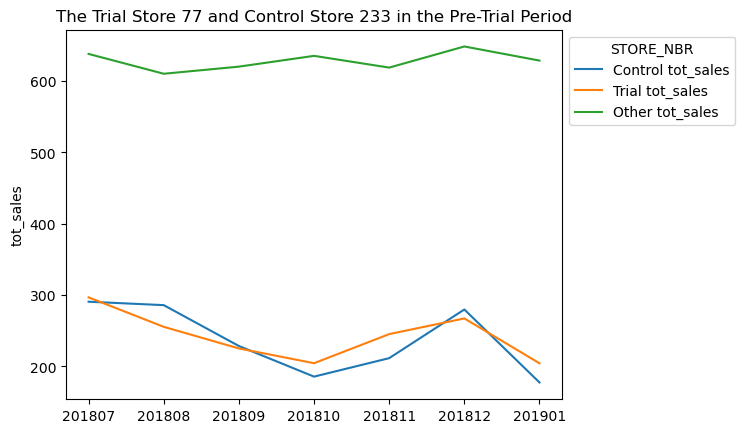

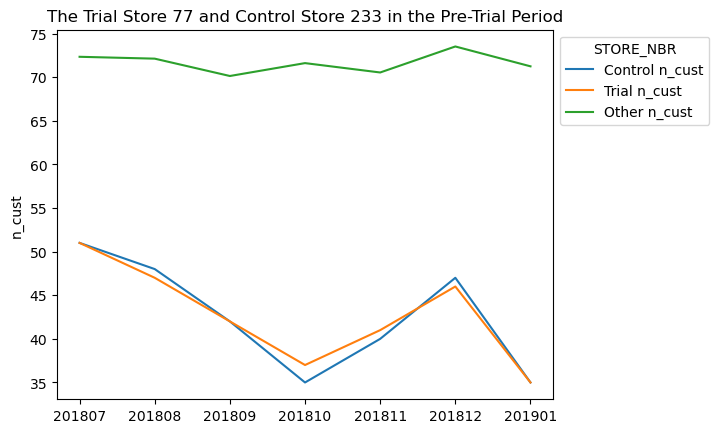

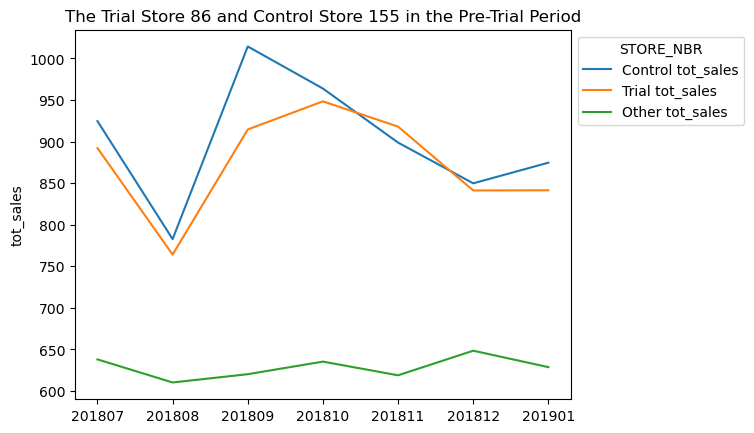

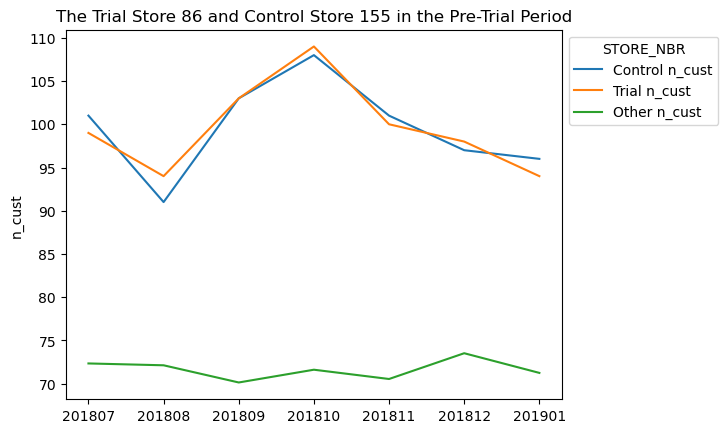

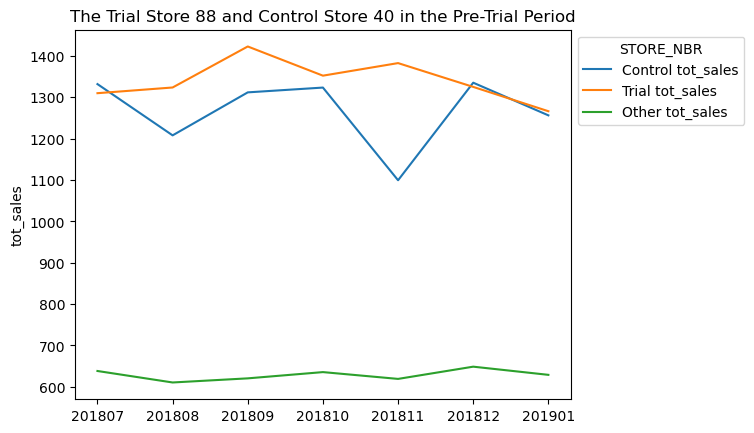

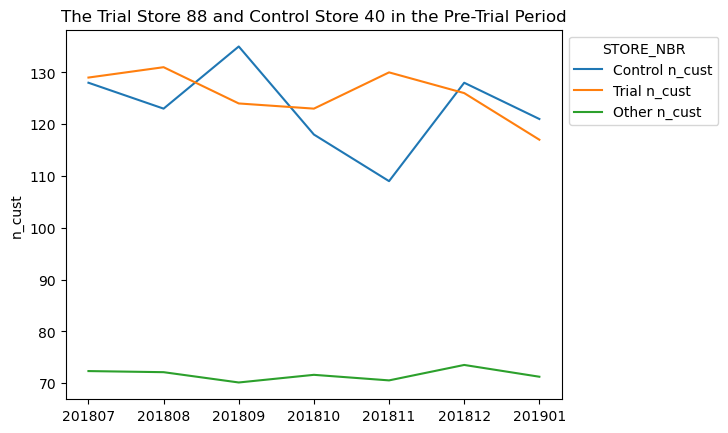

In [37]:
storepair = [[77, 233], [86, 155], [88, 40]]
metric_col = ['tot_sales', 'n_cust']
for pair in storepair:
    for metric in metric_col:
        make_plots(pair, metric)

In [38]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['tot_sales'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['tot_sales'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['tot_sales'].sum()

In [39]:
# Extract the control store data from the df and scale according to the store 
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "YEARMONTH", 'tot_sales']]
scaled_control233.tot_sales *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "YEARMONTH", 'tot_sales']]
scaled_control155.tot_sales *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "YEARMONTH", 'tot_sales']]
scaled_control40.tot_sales *= scale_store88

# Combine the scaled control stores to a single df
scaledsales_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledsales_control = scaledsales_control.rename(columns = {'tot_sales':'scaled_tot_sales', 'STORE_NBR': 'CONTROL_NBR'}) 
# Get the trial period of scaled control stores 
scaledsales_control_trial = scaledsales_control[(scaledsales_control.YEARMONTH>=201902) & (scaledsales_control.YEARMONTH<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores 
trialsales = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "YEARMONTH", 'tot_sales']].reset_index(drop = True)
trialsales = trialsales.rename(columns = {'STORE_NBR': 'TRIAL_NBR'}) 
trialsales_trial = trialsales[(trialsales.YEARMONTH >= 201902) & (trialsales.YEARMONTH <= 201904)].reset_index(drop = True)

In [40]:
# Calculate the percentage difference between the control and trial store pairs for each month over the year   
percentdiff = scaledsales_control.copy()
percentdiff[['TRIAL_NBR', 'tot_sales_t']] = trialsales[['TRIAL_NBR', 'tot_sales']]
percentdiff = percentdiff.rename(columns = {'scaled_tot_sales' : 'scaled_sales_c'})
percentdiff['sales_percent_diff'] = (percentdiff.tot_sales_t-percentdiff.scaled_sales_c)\
                                    /(0.5*((percentdiff.scaled_sales_c+percentdiff.tot_sales_t)))
percentdiff.head()

,CONTROL_NBR,YEARMONTH,scaled_sales_c,TRIAL_NBR,tot_sales_t,sales_percent_diff
0,233,201807,297.565550,77,296.8,-0.002576
1,233,201808,292.652187,77,255.5,-0.135554
2,233,201809,233.998916,77,225.2,-0.038323
3,233,201810,190.085733,77,204.5,0.073060
4,233,201811,216.597421,77,245.3,0.124281


In [41]:
# As our null hypothesis is that the trial period is the same as the pre-trial period,
# let's take the standard deviation based on the scaled percentage difference in the pre-trial period.
pretrial_percentdiff = percentdiff[percentdiff.YEARMONTH < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['sales_percent_diff'].agg('std').reset_index()
dof = 6 # 7 months of data - 1 

for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.YEARMONTH < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['sales_percent_diff'].agg('std')
    mean =  pretrial['sales_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.YEARMONTH.unique():
        xval = trialperiod[trialperiod.YEARMONTH == month]['sales_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()
    
# Generate the t-statistic for the 95% percentile with 6 dof
print ('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.7171038288055838
201903  :  3.035317928855674
201904  :  4.708944418758219

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  1.4133618775921597
201903  :  7.123063846042147
201904  :  0.8863824572944234

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.5481633746817577
201903  :  1.0089992743637823
201904  :  0.9710006270463672

95th percentile value: 1.9431802803927816


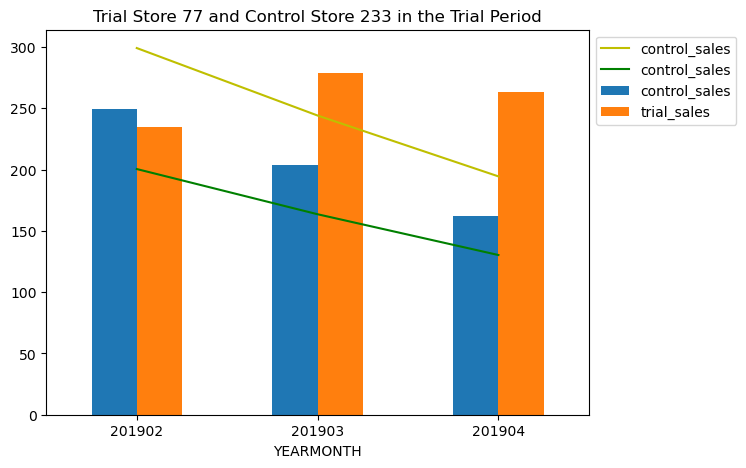

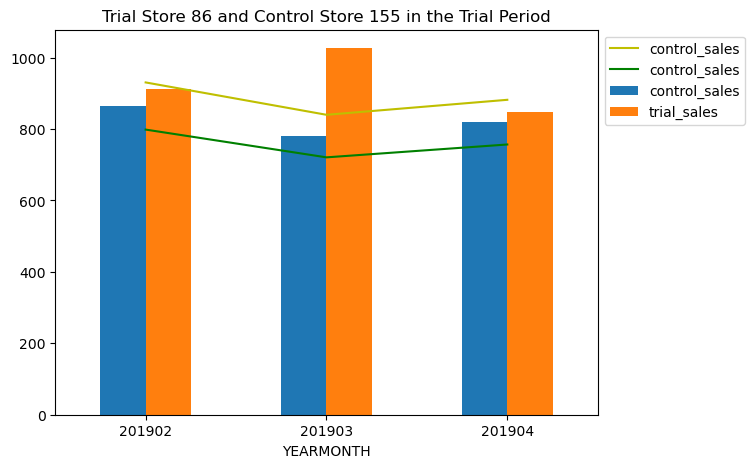

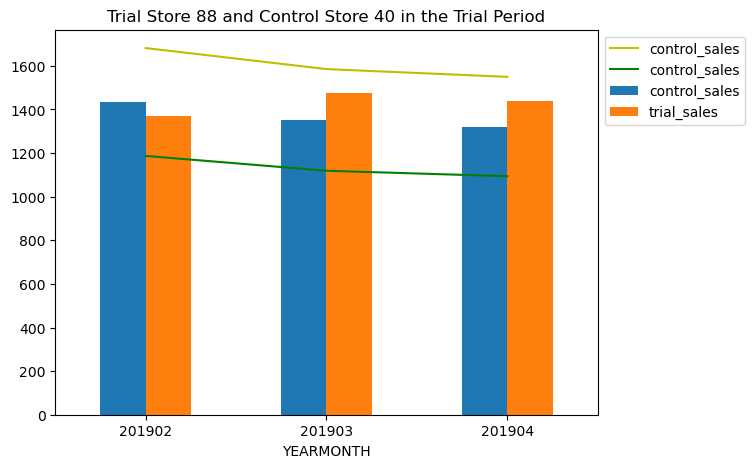

In [42]:
# First do bar graphs during the trial period
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]
    
    # Plot the bar chart of sales performance 
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})
    toplot = plot_control[["YEARMONTH", "control_sales"]].merge(plot_trial[["YEARMONTH", "trial_sales"]],on="YEARMONTH").set_index("YEARMONTH")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))
    

    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_sales',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_sales', color='g', figsize=(7, 5), use_index=False, ax = ax)    
    
    # Other plot features
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

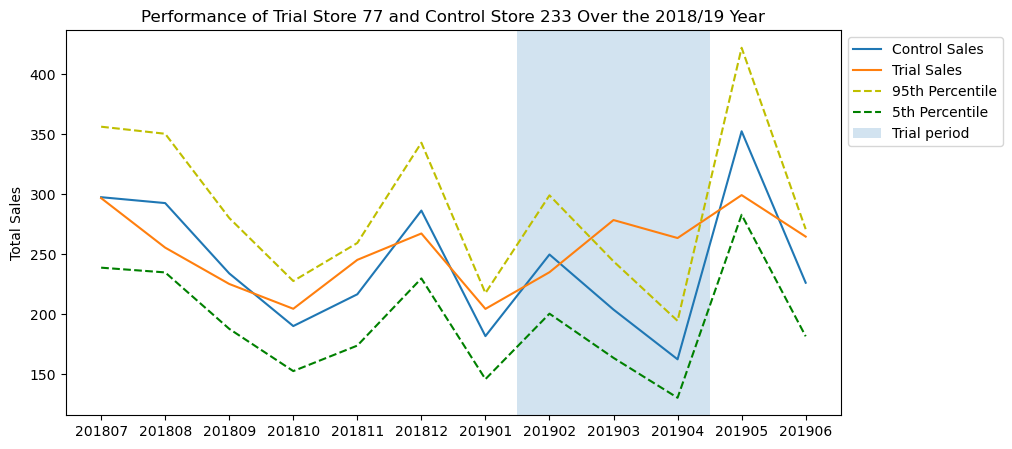

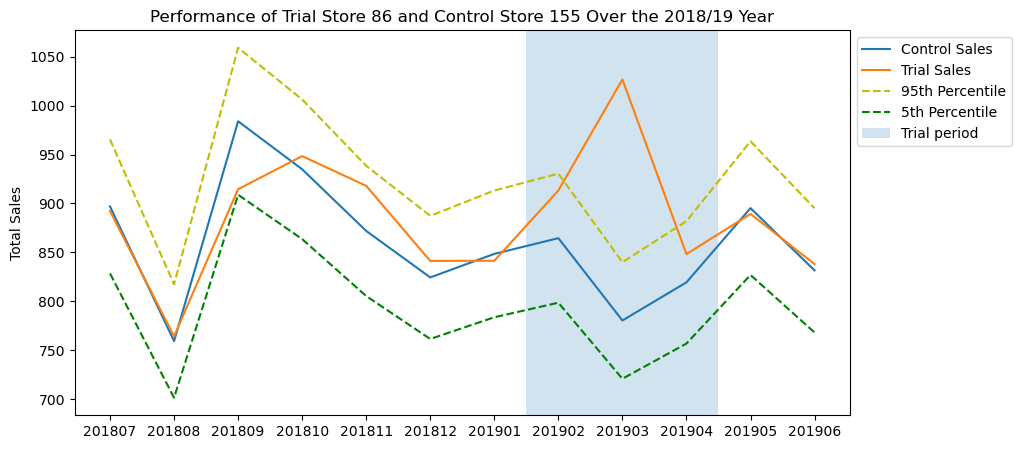

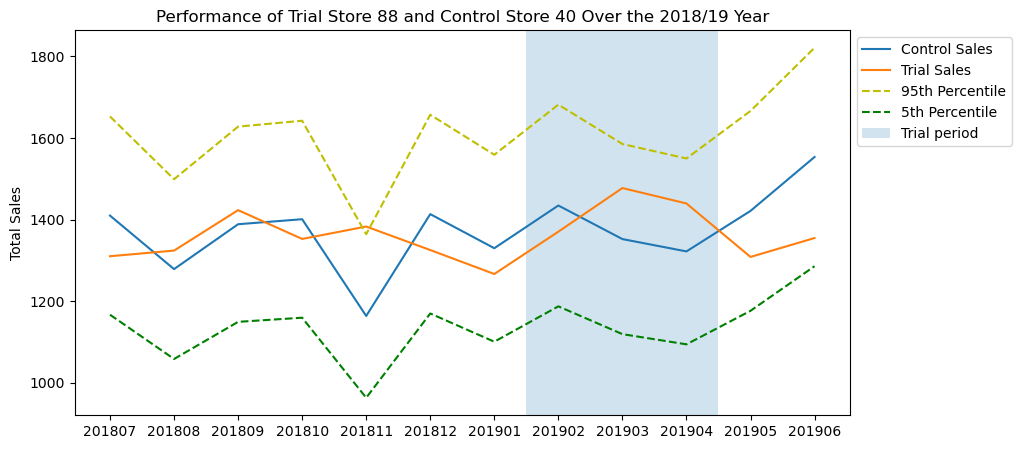

In [43]:
# Then do line graphs during the whole year - for the report 
from matplotlib.patches import Rectangle
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]
    
    # Plot the line graph of sales performance 
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)][['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)][['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})
    
    ax = plot_control.plot.line(x = "YEARMONTH", y = 'control_sales', use_index=False, label = 'Control Sales')
    ax_trial = plot_trial.plot.line(x = "YEARMONTH", y = 'trial_sales', use_index=False, ax=ax, label = 'Trial Sales')
    

    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_sales',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_sales', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')    
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))
    
    # Other plot features
    ax.set_ylabel('Total Sales')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

In [44]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['n_cust'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['n_cust'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['n_cust'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['n_cust'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['n_cust'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['n_cust'].sum()

In [45]:
# Extract the control store data from the df and scale according to the store 
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "YEARMONTH", 'n_cust']]
scaled_control233.n_cust *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "YEARMONTH", 'n_cust']]
scaled_control155.n_cust *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "YEARMONTH", 'n_cust']]
scaled_control40.n_cust *= scale_store88

# Combine the scaled control stores to a single df
scaledncust_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledncust_control = scaledncust_control.rename(columns = {'n_cust':'scaled_n_cust', 'STORE_NBR': 'CONTROL_NBR'}) 
# Get the trial period of scaled control stores 
scaledncust_control_trial = scaledncust_control[(scaledsales_control.YEARMONTH>=201902) & (scaledsales_control.YEARMONTH<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores 
trialncust = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "YEARMONTH", 'n_cust']].reset_index(drop = True)
trialncust = trialncust.rename(columns = {'STORE_NBR': 'TRIAL_NBR'}) 
trialncust_trial = trialncust[(trialncust.YEARMONTH >= 201902) & (trialsales.YEARMONTH <= 201904)].reset_index(drop = True)

In [46]:
# Calculate the percentage difference between the control and trial store pairs for each month over the year   
percentdiff = scaledncust_control.copy()
percentdiff[['TRIAL_NBR', 'n_cust_t']] = trialncust[['TRIAL_NBR', 'n_cust']]
percentdiff = percentdiff.rename(columns = {'scaled_n_cust' : 'scaled_n_cust_c'})
percentdiff['cust_percent_diff'] = (percentdiff.n_cust_t-percentdiff.scaled_n_cust_c)\
                                    /(0.5*((percentdiff.scaled_n_cust_c+percentdiff.n_cust_t)))
percentdiff.head()

,CONTROL_NBR,YEARMONTH,scaled_n_cust_c,TRIAL_NBR,n_cust_t,cust_percent_diff
0,233,201807,51.171141,77,51,-0.003350
1,233,201808,48.161074,77,47,-0.024402
2,233,201809,42.140940,77,42,-0.003350
3,233,201810,35.117450,77,37,0.052208
4,233,201811,40.134228,77,41,0.021342


In [47]:
# As our null hypothesis is that the trial period is the same as the pre-trial period,
# let's take the standard deviation based on the scaled percentage difference in the pre-trial period.
pretrial_percentdiff = percentdiff[percentdiff.YEARMONTH < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['cust_percent_diff'].agg('std').reset_index()
dof = 6 # 7 months of data - 1 

for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.YEARMONTH < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['cust_percent_diff'].agg('std')
    mean =  pretrial['cust_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.YEARMONTH.unique():
        xval = trialperiod[trialperiod.YEARMONTH == month]['cust_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()
    
# Generate the t-statistic for the 95% percentile with 6 dof
print ('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.19886295797440687
201903  :  8.009609025380932
201904  :  16.114474772873923

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  6.220524882227514
201903  :  10.52599074274189
201904  :  3.0763575852842706

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.3592881735131531
201903  :  1.2575196020616801
201904  :  0.6092905590514273

95th percentile value: 1.9431802803927816


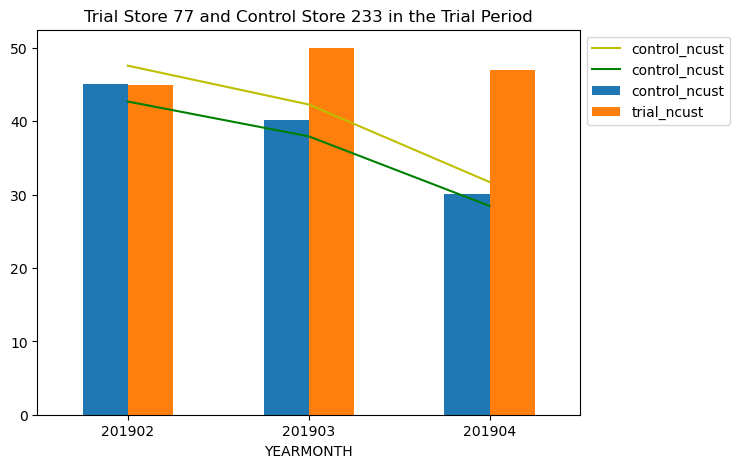

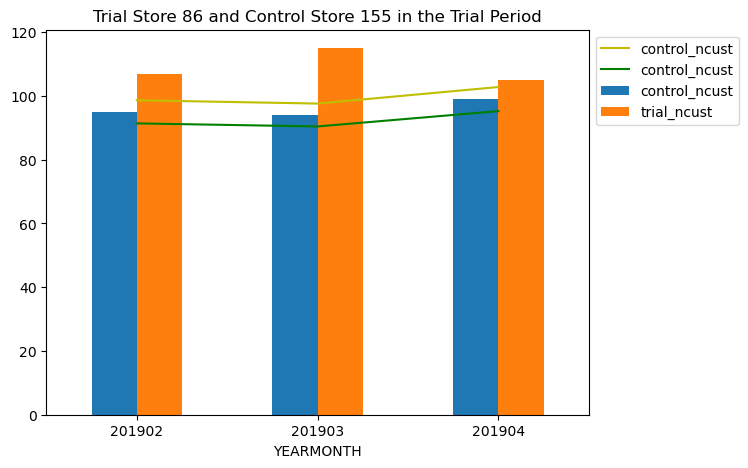

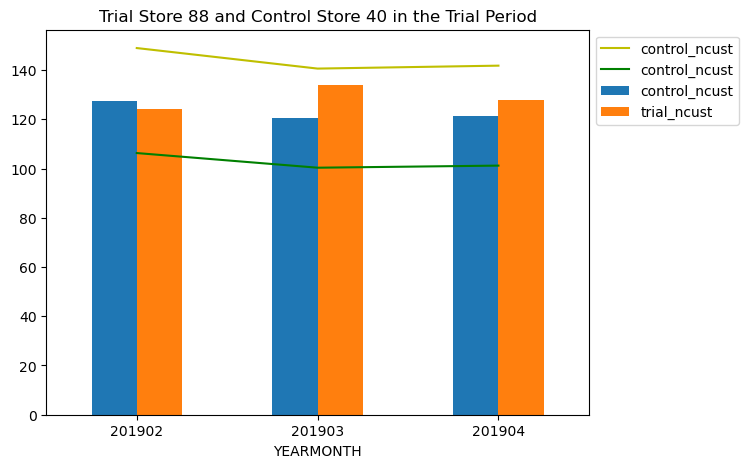

In [48]:
# First do bar charts to focus on the trial period
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]    
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})
    toplot = plot_control[["YEARMONTH", "control_ncust"]].merge(plot_trial[["YEARMONTH", "trial_ncust"]],on="YEARMONTH").set_index("YEARMONTH")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))
    

    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_ncust',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_ncust', color='g', figsize=(7, 5), use_index=False, ax = ax)    
    
    # Other plot features
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

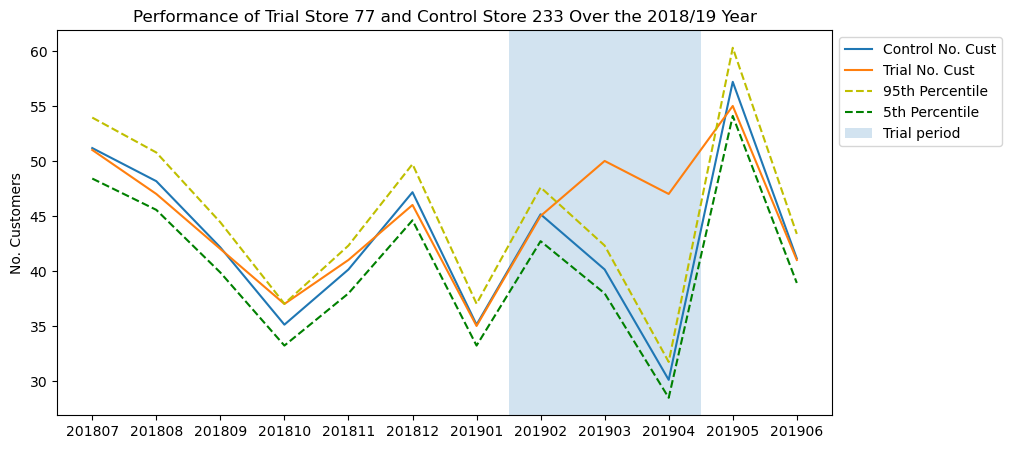

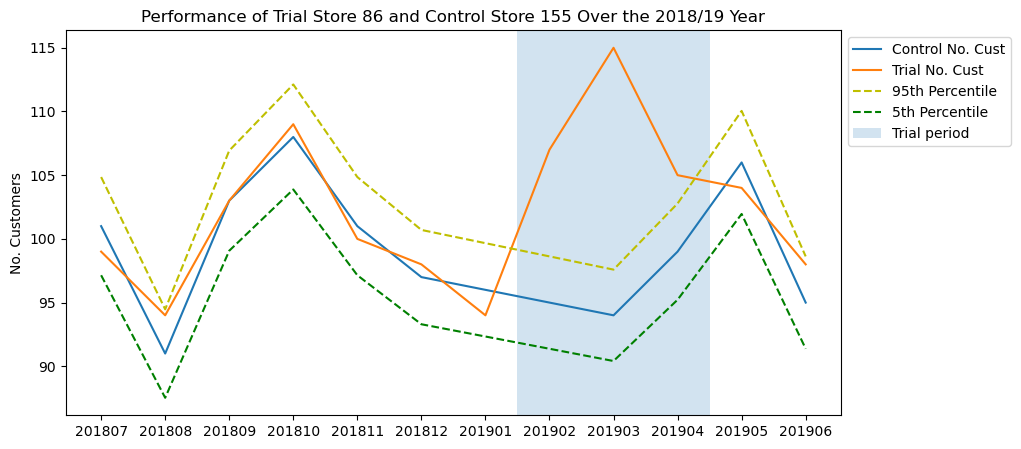

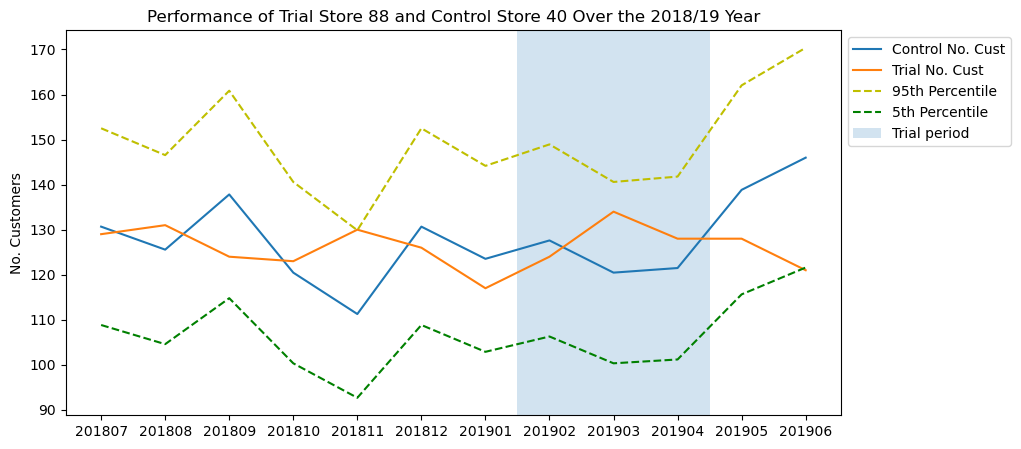

In [49]:
# Then do line graphs to show a full year's trend 
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]    
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})
    
    ax = plot_control.plot.line(x = "YEARMONTH", y = 'control_ncust', use_index=False, label = 'Control No. Cust')
    ax_trial = plot_trial.plot.line(x = "YEARMONTH", y = 'trial_ncust', use_index=False, ax=ax, label = 'Trial No. Cust')
    
    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_ncust',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_ncust', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')    
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))  
    
    # Other plot features
    ax.set_ylabel('No. Customers')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()